# Exploring the ratings of restaurants in India

Zomato is a restaurant reviews aggregator site which provides a platform for restaurant goers to review various restaurants they have visited. This data has been obtained from Kaggle datasets.

In [3]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploring the Data

In [4]:
data = pd.read_csv(r'C:\Users\user\Desktop\zomato.csv', encoding = "ISO-8859-1")

In [5]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
country_code = pd.read_excel(r'C:\Users\user\Desktop\Country-Code.xlsx')

In [8]:
country_code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


# Let's have a look at the restaurants in India

We need to get the country code of India first. Although we see that directly here that the country code is 1 for India, it would be a good exercise to try to extract it from the data at hand.

In [9]:
country_code[country_code['Country'] == 'India']['Country Code']

0    1
Name: Country Code, dtype: int64

Thus the country code is 1, it is possible to find the country code of any other country using the above command.

In [10]:
data_india = data[data['Country Code'] == 1]

In [11]:
data_india.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


# Finding the list of cuisines available in Indian restaurants

In [12]:
data_india['Cuisines'].unique()

array(['North Indian, Mughlai', 'North Indian', 'Rajasthani', ...,
       'Continental, Seafood, Chinese, North Indian, Biryani',
       'Burger, Pizza, Biryani',
       'American, North Indian, Thai, Continental'], dtype=object)

# Total no of cuisines

In [13]:
data_india['Cuisines'].nunique()

1392

# Total no. of restaurants in India

In [14]:
data_india['Restaurant ID'].nunique()

8652

In [15]:
data_india.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Most of the restaurants covered by Zomata ratings and reviews seems to be in India in this particular data set.

# What are we looking for?

As we go along with the analysis we will try to find out what factors influences the ratings of the restaurants. The ability to book a table for example might influence how a potential customer leaves a rating. Another important factor would be the authenticity of the cuisine being served. As a general rule of thumb one might say that a multi-cuisine restaurant might be less authentic than one that serves only one type of cuisine. I will try to cover such aspects in this analysis:

In [16]:
sns.set(font_scale=1.2, rc={'figure.figsize':(8,5)})
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

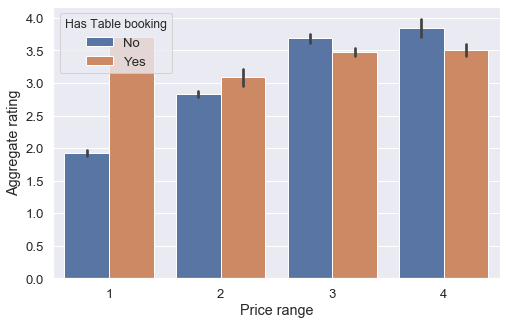

In [17]:
sns.barplot(x="Price range", y='Aggregate rating', hue='Has Table booking', data=data_india)

It seems that for restaurants that are more affordable (has a lower price range) have higher ratings if they provide table booking services.For pricier restaurants table booking option does not seem to affect the ratings much.

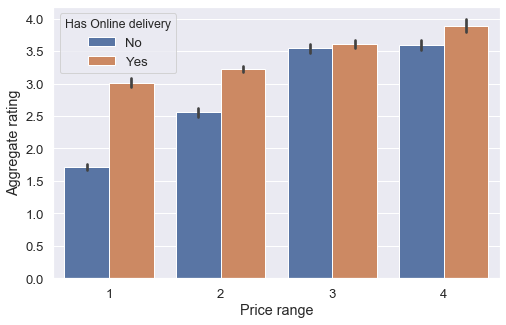

In [18]:
sns.barplot(x="Price range", y='Aggregate rating', hue='Has Online delivery', data=data_india)

Again for restaurants that are in the lower price range (1 and 2) seems to have better average rating if they provide online delivery services. This is not so signficant for the restaurants falling in the pricier category.

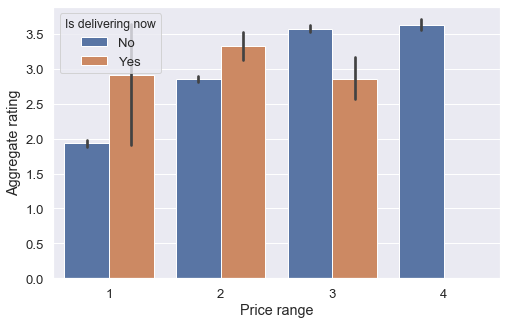

In [19]:
sns.barplot(x="Price range", y='Aggregate rating', hue='Is delivering now', data=data_india)

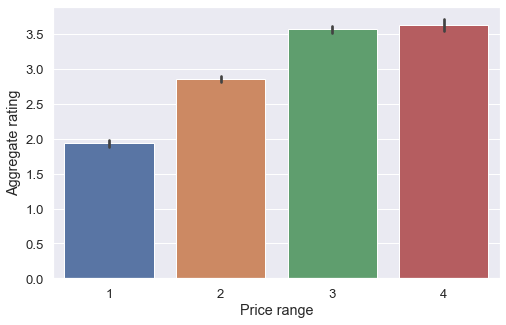

In [20]:
sns.barplot(x="Price range", y='Aggregate rating', data=data_india)

The 'Switch to order menu' service is not provided by any of the restaurants that have been reviewed in Zomato. But this interestingly shows the general trend of ratings provided by the users. The lower price restaurants in general have worser ratings compared to the pricier ones. There is essentially little difference in the ratings of price categories 1 and 2.

# Cuisines provided by the restaurants

The above restaurants are a mix of single cusine and multi-cuisine restaurant. The rating of restaurants will be affected by the authenticity of the cuisine they are serving. I will first make a column of cusines that is served by the restaurants.

In [21]:
def cusines_count(text):
    x = text.split(',')
    return len(x)

In [22]:
x = data_india['Cuisines'].apply(cusines_count)

In [23]:
x = x.rename("No. of cuisines")

In [24]:
x.name

'No. of cuisines'

In [25]:
data_modified = pd.concat([data_india, x], axis= 1)

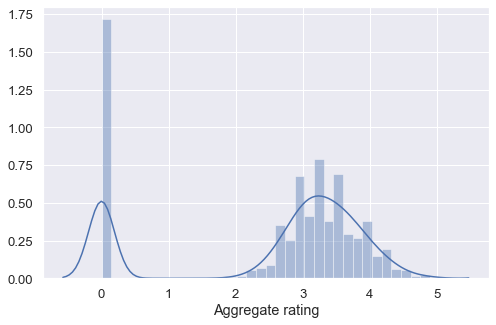

In [26]:
#Mean of all ratings
sns.distplot(data_modified['Aggregate rating'])

There are a lot of unrated restaurants in this dataset which would not contribute to understanding the dynamics of restaurant goers in India. We will remove all this data points to have a more representative sample. It might be possible to predict the ratings of those restaurants based on the characteristics of the restaurants that have already been rated.

Let us now remove the data points that do not have any votes or ratings

In [27]:
data_rated_restaurants = data_modified[(data_modified['Aggregate rating']>0)&(data_modified['Votes']>0)]

In [28]:
data_rated_restaurants.shape

(6513, 22)

Let us have another look now at the distribution of aggregrate ratings among all restaurants.

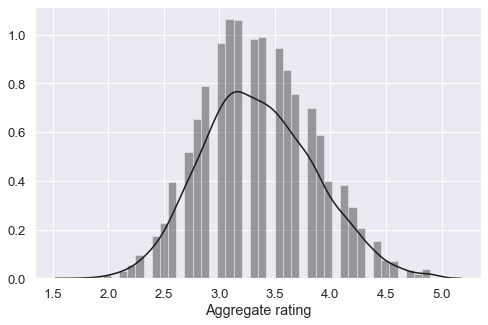

In [29]:
sns.distplot(data_rated_restaurants['Aggregate rating'], color='k')

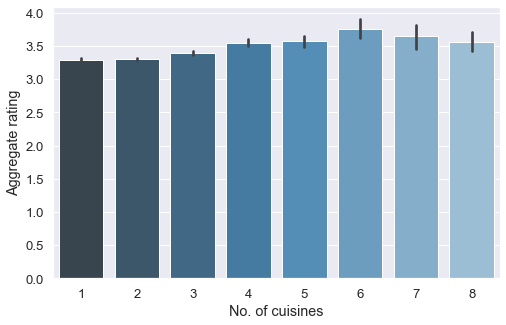

In [30]:
sns.barplot(x ='No. of cuisines', y = 'Aggregate rating', data= data_rated_restaurants, palette="Blues_d" )

This is very interesting situation. It seems that contrary to my own expectations, it seems that multi-cusine restaurants in India seems to have a little better aggregrate rating. It would be interesting to see the distribution divided between the four price ranges

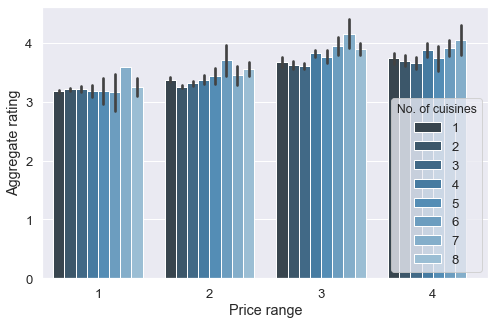

In [31]:
sns.barplot(x ="Price range", y = 'Aggregate rating', hue= 'No. of cuisines', data= data_rated_restaurants, palette="Blues_d" )

The trend of the aggregate rating being better for multicuisine restaurant seems to be valid for all the price range of restaurants. Thus in India it is likely that if you have a multi-cuisine restaurant it would probably get better ratings. Additionally, the highest price category restaurants provide no more than 7 cuisines.

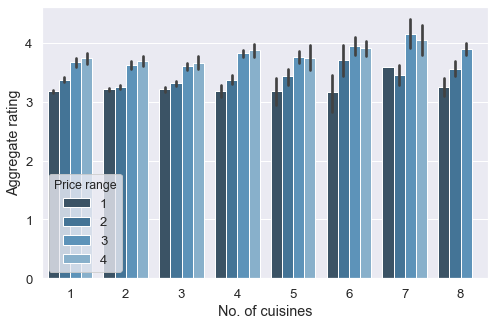

In [32]:
sns.barplot(x ='No. of cuisines', y = 'Aggregate rating', hue="Price range" , data= data_rated_restaurants, palette="Blues_d" )

We can infer from above that the aggregate rating of the restaurants tend to increase with the price range irrespective of the number of cuisines that they serve.

# Voting trends

In [33]:
data_rated_restaurants.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,No. of cuisines
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,2
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,2
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,1
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,1
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,3


Another important parameter to know the is number of footfalls of each restaurants. However what we have here is the number of reviewers which is only proportional to the total number of footfalls over a given duration. Since the duration during which the reviews were obtained are not given, we will assume this to be the same for all restaurants as of now to have a general idea about the number of people who visit the restaurant. The number of footfalls per restaurant should also depend on the population of the city in which the restaurant is located, the location itself, cuisine etc. Curiously enough a better aggregate rating should also contribute to the number of footfalls.

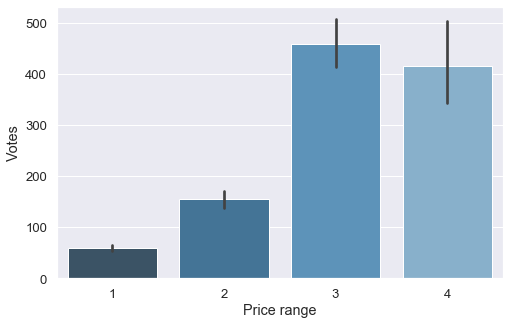

In [34]:
sns.barplot(x ="Price range", y = 'Votes', data= data_rated_restaurants, palette="Blues_d" )

The more pricier restaurants seems to have larger number of reviews which implies the pricier restaurants seems to have a better footfall. It might be also possible that people who visit these restaurants are more internet savvy and likely to leave a review. Let us look at the relation between average rating and number of votes:

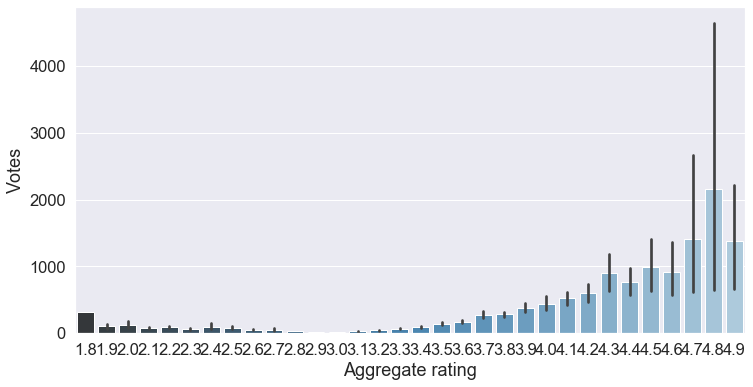

In [35]:
sns.set(font_scale=1.5, rc={'figure.figsize':(12,6)})
sns.barplot('Aggregate rating', 'Votes', data= data_rated_restaurants, palette="Blues_d")

The above plot shows that the average votes received are disproportionately higher in the case of restaurants with higher ratings. Also the variability of footfalls is also large for the highly rated restaurants. This might be because there might be new restaurants which has better aggregate rating. However since the data does not mention the period during which the restaurants were obtained this is just a speculation. The location of the restaurant, how easily it is accessible by public transport, the population density in the region where it is located, whether it is closer to the center of the city etc. will also similarly play a role in determining the number of footfalls.

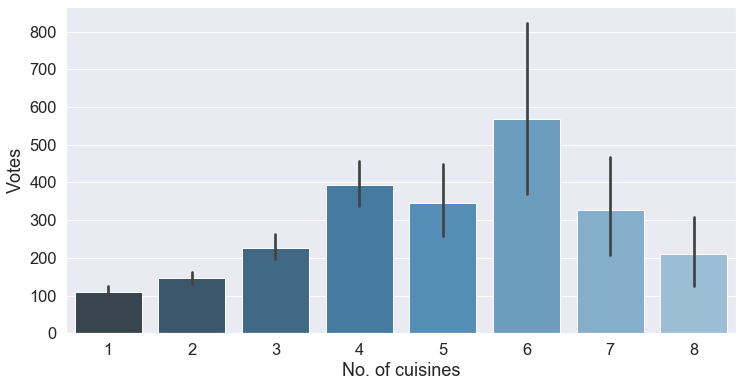

In [36]:
sns.set(font_scale=1.5, rc={'figure.figsize':(12,6)})
sns.barplot('No. of cuisines', 'Votes', data= data_rated_restaurants, palette="Blues_d")

The average votes received are also higher for restaurants that are multi-cuisine. It would be also be interesting to see the voting amoung different number of cuisines provided.

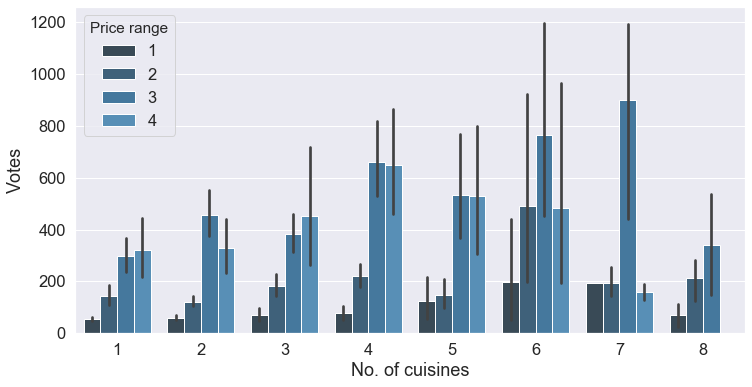

In [37]:
sns.barplot('No. of cuisines', 'Votes', hue= 'Price range', data= data_rated_restaurants, palette=sns.color_palette("Blues_d"))

# Cities

It would also be interesting to know the cities in India where these restaurants are located

In [38]:
print(data_rated_restaurants['City'].unique())
print(data_rated_restaurants['City'].nunique())


['Agra' 'Ahmedabad' 'Allahabad' 'Amritsar' 'Aurangabad' 'Bangalore'
 'Bhopal' 'Bhubaneshwar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Dehradun'
 'Faridabad' 'Ghaziabad' 'Goa' 'Gurgaon' 'Guwahati' 'Hyderabad' 'Indore'
 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Ludhiana' 'Mangalore'
 'Mohali' 'Mumbai' 'Mysore' 'Nagpur' 'Nashik' 'New Delhi' 'Noida'
 'Panchkula' 'Patna' 'Puducherry' 'Pune' 'Ranchi' 'Secunderabad' 'Surat'
 'Vadodara' 'Varanasi' 'Vizag']
43


It would be interesting to see which in which people use Zomato to rate the restaurants. The total number of votes in each city could also be a measure of the popularity of Zomato in that city (or state in which the city is located).

# Most Popular cuisines

In the above restaurants we have both single cuisine and multi-cuisine restaurants. We first need to make the list of all available cuisines across all restaurants. I will try to generate the list of cuisines that are provided by all the restaurants above.

In [39]:
cuisine = []
list_of_cuisines = data_modified.iloc[:,9]
len(list_of_cuisines)

8652

In [40]:
for x in list_of_cuisines:
    y = x.split(', ')
    for i in y:
        if not(i in cuisine):
            cuisine.append(i)
        else:
            pass

In [41]:
print(cuisine, 'total no. of cuisines {}'.format(len(cuisine)))

['North Indian', 'Mughlai', 'Rajasthani', 'Chinese', 'European', 'Gujarati', 'Continental', 'South Indian', 'Desserts', 'Cafe', 'Italian', 'Mexican', 'Pizza', 'Fast Food', 'Mediterranean', 'Thai', 'Ice Cream', 'Beverages', 'Asian', 'Street Food', 'Sandwich', 'Burger', 'Healthy Food', 'American', 'Armenian', 'Salad', 'Bakery', 'Mithai', 'Biryani', 'Juices', 'Maharashtrian', 'Hyderabadi', 'Modern Indian', 'Finger Food', 'Tex-Mex', 'Arabian', 'Charcoal Grill', 'Steak', 'Seafood', 'Tea', 'Japanese', 'Malaysian', 'Burmese', 'Chettinad', 'Spanish', 'Greek', 'Indian', 'Parsi', 'Tibetan', 'Raw Meats', 'French', 'Goan', 'German', 'Kerala', 'Lebanese', 'Belgian', 'Kashmiri', 'Sushi', 'South American', 'Persian', 'Bengali', 'Portuguese', 'African', 'Iranian', 'Vietnamese', 'Lucknowi', 'Korean', 'Awadhi', 'Nepalese', 'Drinks Only', 'Pakistani', 'North Eastern', 'Oriya', 'Bihari', 'Afghani', 'Middle Eastern', 'Indonesian', 'Assamese', 'Andhra', 'Mangalorean', 'British', 'Malwani', 'Cuisine Varies',

Above you can see the list of all cuisines that are served by the restaurants that have been rated by Zomato. There are in total 90 types of cuisines available in total. It would be really interesting to see which cuisines are the most popular among restaurant goers according to Zomato. This is a little challenging as seen from the analysis before as the most popular restaurants are most likely a multi-cuisine restaurant. It is most likely that a combination of particular cuisines seems to be the key to a successful rating. It is also possible that the popular multi-cuisine restaurants have one or two common cuisines. Cuisines served can definitely provide a clue to understanding the popularity of a restaurant.

In [42]:
list_ratings = data_modified.loc[:,'Aggregate rating']
len(list_ratings)

8652

In [43]:
ratings_per_cuisine = []
counts_per_cuisine = []
for cusi in cuisine:
    count = 0
    total_rating = 0
    for cuisines, ratings in zip(list_of_cuisines, list_ratings):
        if cusi in cuisines.split(', '):
            count+=1
            total_rating+=ratings
        else:
            pass
    ratings_per_cuisine.append(total_rating/count)
    counts_per_cuisine.append(count)

In [44]:
len(ratings_per_cuisine)

90

In [45]:
ratings_cuisines = pd.DataFrame({'Cuisines':cuisine, 'Average Rating':ratings_per_cuisine, 'Popularity':counts_per_cuisine} )

In [46]:
ratings_cuisines.head()

,Cuisines,Average Rating,Popularity
0,North Indian,2.505170,3946
1,Mughlai,2.608073,991
2,Rajasthani,3.135000,20
3,Chinese,2.598065,2688
4,European,3.846218,119


In [49]:
cities_states = pd.read_csv(r'C:\Users\user\Desktop\list_of_cities_and_towns_in_india-834j.csv')


In [50]:
cities_states.head()

,S.No,Name of City,State,Type,Population (2011),Population class,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Mumbai,Maharashtra,Municipal Corporation / Corporation,"1,35,97,924",Class I,NaN,NaN,NaN,NaN,NaN
1,2,Delhi,Delhi,Municipal Corporation / Corporation,"1,10,07,835",Class I,NaN,NaN,NaN,NaN,NaN
2,3,Bengaluru,Karnataka,Municipal Corporation / Corporation,"84,25,970",Class I,NaN,NaN,NaN,NaN,NaN
3,4,Ahmedabad,Gujarat,Municipal Corporation / Corporation.,"72,08,200",Class I,NaN,NaN,NaN,NaN,NaN
4,5,Hyderabad,Telangana,Municipal Corporation / Corporation,"68,09,970",Class I,NaN,NaN,NaN,NaN,NaN


In [51]:
cities_states[cities_states['Name of City'] == 'Bengaluru']='Bangalore'
cities_states[cities_states['Name of City'] == 'Bhubaneswar']='Bhubaneshwar'
cities_states.head()

,S.No,Name of City,State,Type,Population (2011),Population class,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Mumbai,Maharashtra,Municipal Corporation / Corporation,"1,35,97,924",Class I,NaN,NaN,NaN,NaN,NaN
1,2,Delhi,Delhi,Municipal Corporation / Corporation,"1,10,07,835",Class I,NaN,NaN,NaN,NaN,NaN
2,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore
3,4,Ahmedabad,Gujarat,Municipal Corporation / Corporation.,"72,08,200",Class I,NaN,NaN,NaN,NaN,NaN
4,5,Hyderabad,Telangana,Municipal Corporation / Corporation,"68,09,970",Class I,NaN,NaN,NaN,NaN,NaN


In [55]:
cities_with_restaurants = data_rated_restaurants['City'].unique()

In [56]:
city2totalrestaurants = {}

In [57]:
for city in cities_with_restaurants:
    
    city2totalrestaurants[city] =(data_rated_restaurants['City'] == city).sum()

In [58]:
city2states = {}

In [59]:
cities_states = cities_states[['Name of City', 'State']].dropna()

In [60]:
cities_of_india = cities_states['Name of City'].unique()

In [61]:
for city in city2totalrestaurants:
    
    if city ==  'Ghaziabad':
        city2states['Ghaziabad'] = 'Uttar Pradesh'
    elif city == 'Goa':
        city2states['Goa'] = 'Goa'
    elif city == 'Mangalore':
        city2states[city] =  'Karnataka'
    elif city == 'Puducherry':
        city2states[city] = 'Puducherry'
    elif city == 'Secunderabad':
        city2states[city] = 'Telangana'
    elif city == 'Vizag':
        city2states[city] = 'Andhra Pradesh'
    elif city == 'Bhubaneshwar':
        city2states[city] = 'Odisha'
    else:
        
        city2states[city] = cities_states[cities_states['Name of City']==city]['State'].unique()[0]

Turns out that we have many missing cities in this list and I had to put in some of the states myself. If you have a better list please feel free to use a better list and rewrite this code. Welcome to the real world of data science where most data is not clean.

In [62]:
city2states['Vizag']

'Andhra Pradesh'

In [63]:
statenames = cities_states['State'].unique()

In [64]:
#Initialize all key entries with zero
states2restaurants = dict.fromkeys(statenames, 0)

In [65]:
for city in city2states:
    if city in city2totalrestaurants:
        states2restaurants[city2states[city]] += city2totalrestaurants[city]

Karnataka has been mispelled in this dataset. I will first assign the correct restaurant number to the correct key. This should suffice for now. In addition we have Delhi as marked as NCT of Delhi in map so I will add this entry manually:



In [66]:
states2restaurants['Karnataka'] = states2restaurants['Karnatka']
states2restaurants['NCT of Delhi'] = states2restaurants['Delhi']